In [1]:
import os
os.getcwd()

os.chdir(r"C:\Users\danna\OneDrive\Desktop\DataSetProject")
os.getcwd()




import pandas as pd

In [2]:
data = pd.read_csv('region_hospital_icu_covid_data.csv')

This dataset is from https://data.ontario.ca/dataset/covid-19-cases-in-hospital-and-icu-by-ontario-health-region

It has 8 input variables:

1. date
2. OH region
3. icu_current covid - current patients in Intensive Care Units (ICUs) testing positive for COVID
4. icu_current_covid_vented - current patients in Intensive Care Units (ICUs) on ventilators testing positive for COVID
5. icu_crci_total - patients in Intensive Care Units (ICUs) due to COVID-related critical Illness
6. icu_crci_total_vented - current patients in Intensive Care Units (ICUs) on ventilators due to COVID-related 
7. critical illness
8. icu_former_covid - current patients in Intensive Care Units (ICUs) no longer testing positive for COVID
9. icu_former_covid_vented - current patients in Intensive Care Units (ICUs) on ventilators no longer testing positive for 
COVID 
And 1 output variable:
1. hospitalizations - current hospitalizations with COVID-19
This dataset comprises records from April 4, 2020 until September 7, 2021.

Hospitalization includes all cases for which a hospital admission date was reported at the time of data extraction. 
It includes cases that have been discharged from hospital as well as cases that are currently hospitalized. 
Emergency room visits are not included in the number of reported hospitalizations. ICU admission includes all cases 
for which an ICU admission date was reported at the time of data extraction. It is a subset of 
the count of hospitalized cases. It includes cases 
that have been treated or that are currently being treated in an ICU.

Data set info and its data types. It has 2 object variables, and 7 numerical variableswith 2615 observations.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      2615 non-null   object
 1   oh_region                 2615 non-null   object
 2   icu_current_covid         2615 non-null   int64 
 3   icu_current_covid_vented  2615 non-null   int64 
 4   hospitalizations          2615 non-null   int64 
 5   icu_crci_total            2615 non-null   int64 
 6   icu_crci_total_vented     2615 non-null   int64 
 7   icu_former_covid          2615 non-null   int64 
 8   icu_former_covid_vented   2615 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 184.0+ KB


The first 5 observations of the data set.

In [4]:
data.head()

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-04-02,CENTRAL,51,39,113,0,0,0,0
1,2020-04-03,CENTRAL,57,52,141,0,0,0,0
2,2020-04-04,CENTRAL,65,57,143,0,0,0,0
3,2020-04-05,CENTRAL,65,55,174,0,0,0,0
4,2020-04-06,CENTRAL,73,58,187,0,0,0,0


Checked the missing values, it has no missing values.

In [6]:
data.isna().sum()

date                        0
oh_region                   0
icu_current_covid           0
icu_current_covid_vented    0
hospitalizations            0
icu_crci_total              0
icu_crci_total_vented       0
icu_former_covid            0
icu_former_covid_vented     0
dtype: int64

This is the summary statistics of all numerical columns.

In [7]:
data.describe()

,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
count,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000
mean,45.393499,31.087189,132.797323,48.293308,32.305545,5.541491,3.288719
std,51.282310,36.654595,156.346026,55.839103,39.243862,6.253668,3.967977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,6.000000,4.000000,16.000000,6.000000,3.000000,0.000000,0.000000
50%,26.000000,17.000000,72.000000,26.000000,17.000000,3.000000,2.000000
75%,66.000000,46.000000,191.500000,71.000000,48.000000,9.000000,5.000000
max,278.000000,217.000000,974.000000,295.000000,224.000000,34.000000,22.000000


This dataset comprises records from April 4, 2020 until September 7, 2021.

In [8]:
data["date"].min()

'2020-04-02'

In [9]:
data["date"].max()

'2021-09-07'

Since we cannot do linear regression with dates which has string data types, I will convert it into numerical value.

In [10]:
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date']=data['date'].map(dt.datetime.toordinal)
data

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,737517,CENTRAL,51,39,113,0,0,0,0
1,737518,CENTRAL,57,52,141,0,0,0,0
2,737519,CENTRAL,65,57,143,0,0,0,0
3,737520,CENTRAL,65,55,174,0,0,0,0
4,737521,CENTRAL,73,58,187,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2610,738036,WEST,55,36,124,61,39,6,3
2611,738037,WEST,61,33,111,67,36,6,3
2612,738038,WEST,65,36,106,71,39,6,3
2613,738039,WEST,70,39,115,76,41,6,2


Below are the frequency values of each region on the data set.

In [11]:
data.oh_region.value_counts()

NORTH      523
WEST       523
CENTRAL    523
TORONTO    523
EAST       523
Name: oh_region, dtype: int64

Visualization for all numerical columns.

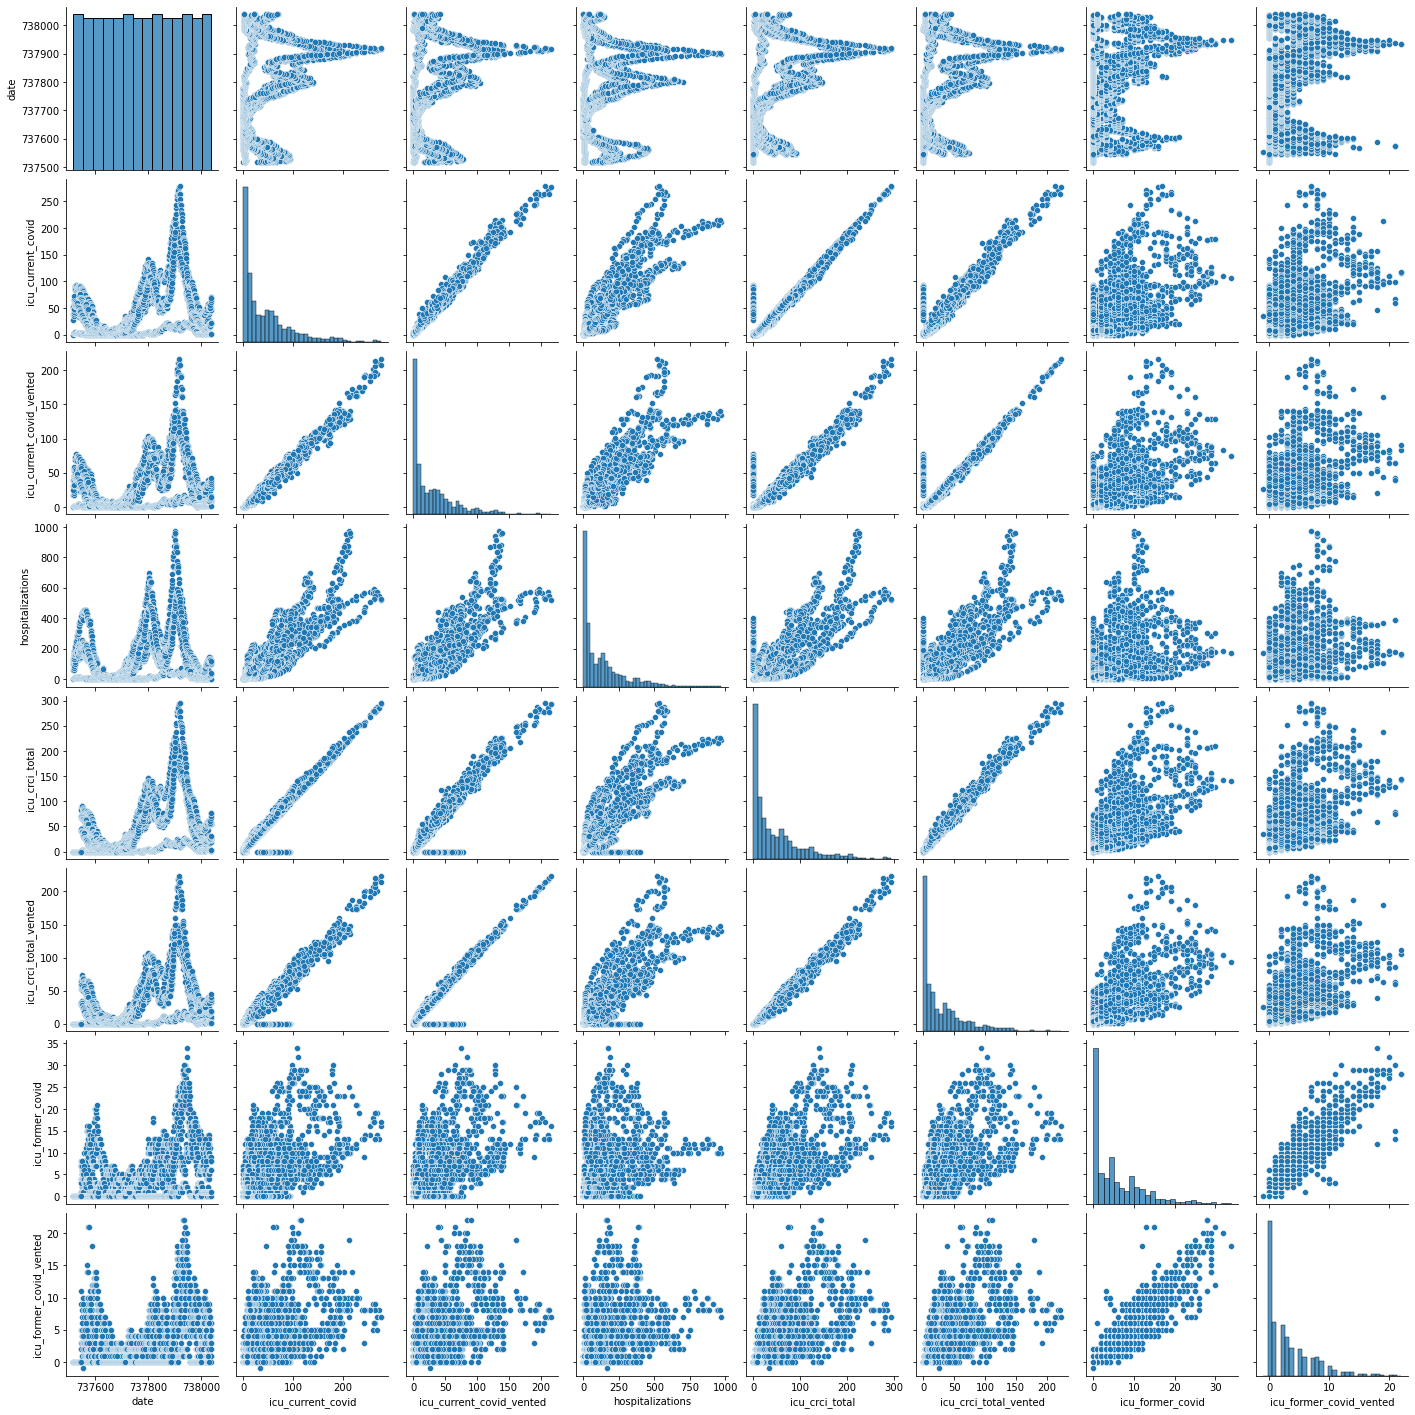

In [14]:
import seaborn as sns
sns.pairplot(data)

I did dummy encoding for oh_region since it is categorical column and is nominal.

In [12]:
data_new = pd.get_dummies(data,columns=['oh_region'],drop_first=True)

In [13]:
data_new

,date,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented,oh_region_EAST,oh_region_NORTH,oh_region_TORONTO,oh_region_WEST
0,737517,51,39,113,0,0,0,0,0,0,0,0
1,737518,57,52,141,0,0,0,0,0,0,0,0
2,737519,65,57,143,0,0,0,0,0,0,0,0
3,737520,65,55,174,0,0,0,0,0,0,0,0
4,737521,73,58,187,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2610,738036,55,36,124,61,39,6,3,0,0,0,1
2611,738037,61,33,111,67,36,6,3,0,0,0,1
2612,738038,65,36,106,71,39,6,3,0,0,0,1
2613,738039,70,39,115,76,41,6,2,0,0,0,1


Extraction of x and y variable from the data set.

In [15]:
X = data_new.drop('hospitalizations',axis=1)
y = data_new.hospitalizations

In [16]:
X.head()

,date,icu_current_covid,icu_current_covid_vented,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented,oh_region_EAST,oh_region_NORTH,oh_region_TORONTO,oh_region_WEST
0,737517,51,39,0,0,0,0,0,0,0,0
1,737518,57,52,0,0,0,0,0,0,0,0
2,737519,65,57,0,0,0,0,0,0,0,0
3,737520,65,55,0,0,0,0,0,0,0,0
4,737521,73,58,0,0,0,0,0,0,0,0


In [17]:
y.head()

0    113
1    141
2    143
3    174
4    187
Name: hospitalizations, dtype: int64

In [18]:
X.corr()

,date,icu_current_covid,icu_current_covid_vented,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented,oh_region_EAST,oh_region_NORTH,oh_region_TORONTO,oh_region_WEST
date,1.000000e+00,0.324300,0.291626,0.423446,0.395415,0.429892,0.363097,-1.091506e-17,5.839330e-19,-1.091506e-17,-2.335732e-18
icu_current_covid,3.243000e-01,1.000000,0.990689,0.963677,0.957992,0.551913,0.512320,-5.217128e-03,-3.949914e-01,-1.129570e-02,1.268146e-01
icu_current_covid_vented,2.916261e-01,0.990689,1.000000,0.946518,0.956869,0.546957,0.510090,-2.278954e-02,-3.857631e-01,1.083651e-02,1.227233e-01
icu_crci_total,4.234462e-01,0.963677,0.946518,1.000000,0.991794,0.660809,0.613995,-1.557284e-02,-3.873586e-01,2.470352e-02,1.200516e-01
icu_crci_total_vented,3.954153e-01,0.957992,0.956869,0.991794,1.000000,0.651758,0.621287,-3.357112e-02,-3.741555e-01,4.164593e-02,1.130375e-01
icu_former_covid,4.298917e-01,0.551913,0.546957,0.660809,0.651758,1.000000,0.930876,-9.987637e-02,-4.165389e-01,3.407907e-01,4.461715e-02
icu_former_covid_vented,3.630973e-01,0.512320,0.510090,0.613995,0.621287,0.930876,1.000000,-1.282017e-01,-3.850871e-01,3.527957e-01,-1.132609e-02
oh_region_EAST,-1.091506e-17,-0.005217,-0.022790,-0.015573,-0.033571,-0.099876,-0.128202,1.000000e+00,-2.500000e-01,-2.500000e-01,-2.500000e-01
oh_region_NORTH,5.839330e-19,-0.394991,-0.385763,-0.387359,-0.374155,-0.416539,-0.385087,-2.500000e-01,1.000000e+00,-2.500000e-01,-2.500000e-01
oh_region_TORONTO,-1.091506e-17,-0.011296,0.010837,0.024704,0.041646,0.340791,0.352796,-2.500000e-01,-2.500000e-01,1.000000e+00,-2.500000e-01


Correlation matrix of X variables

<AxesSubplot:>

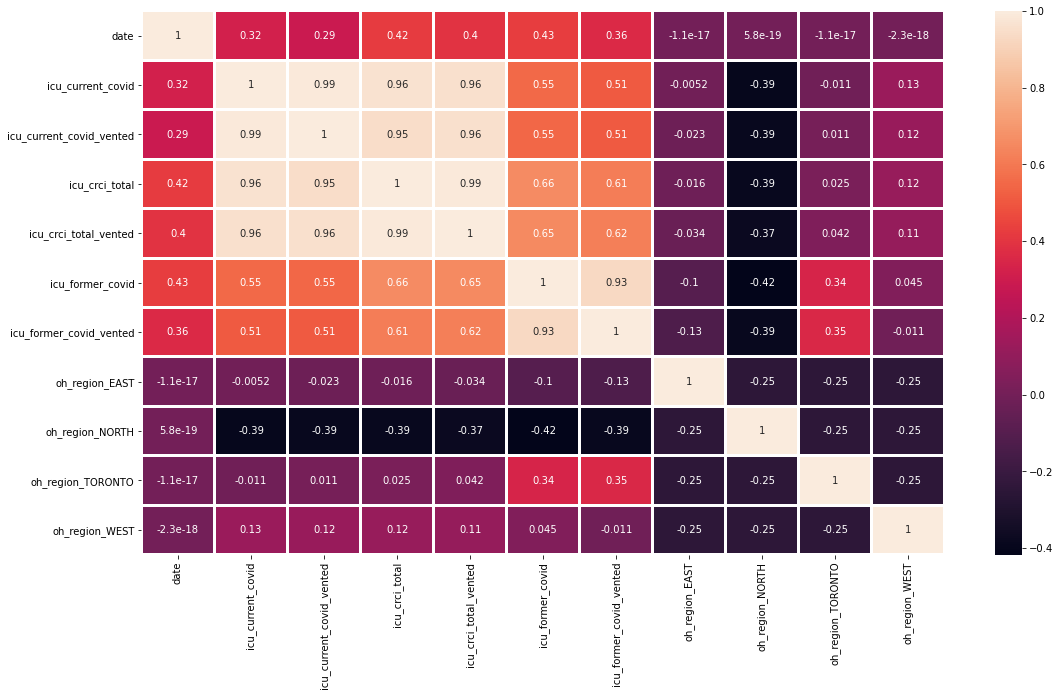

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(X.corr(), annot= True, linewidths = 2)

In [20]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y.astype(float), X2.astype(float))
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       hospitalizations   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1563.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:24:12   Log-Likelihood:                -14269.
No. Observations:                2615   AIC:                         2.856e+04
Df Residuals:                    2603   BIC:                         2.863e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Since we have some variables that has a p value greater than zero we had to eliminate it and afterwards check again by running OLS statsmodel again.



In [21]:
#Backward Feature Elimination
maxp = lr.pvalues.max()
while(maxp > 0.025):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       hospitalizations   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1720.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:24:48   Log-Likelihood:                -14269.
No. Observations:                2615   AIC:                         2.856e+04
Df Residuals:                    2604   BIC:                         2.862e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Importing LinearRegression from sklearn

In [23]:
#Let's use sklearn to do Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

Below R2 value indicates that 86% of the variation in hospitalizations is explained by those predictor variables.

In [24]:
#check R^2 value
R2=model.score(X,y)
R2

0.8685065152985649

In [26]:
n = X.shape[0]
k = X.shape[1]

In [27]:
#Calculate Adj R^2 value
def adjR2(n,k,R2):
    return 1 - ((n-1)/(n-k-1))*(1-R2)

In [28]:
adjR2(n,k,R2)

0.8679508378757006

Split the data to training and test set by importing train_test_split from sklearn.model_selection

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=85)

Train the model on the training set by importing Linear Regression from sklearn and to be able to predict y from x variables using only the observations corresponds to the training set.

In [30]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

Predict the test set results to estimate the response for the test observations.

In [31]:
lrmodel_pred = lrmodel.predict(X_test)

In [32]:
lrmodel_pred[0:10]

array([543.91954175,  26.57463326, 158.956511  , 130.51270352,
        65.16118936, 119.83806694, 380.22063253,  70.53872436,
       -39.62189763, 121.53885778])

In [33]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, lrmodel_pred)
MSE

3490.1372017145545

MSE helps us to determine the average squared difference between the actual y value and the predicted y value.

In [34]:
import math
RMSE = math.sqrt(MSE)
RMSE

59.077383165764495

In [35]:
#Training score 
R2 = lrmodel.score(X_train,y_train)
print('Training R2 =',R2) #r2 value
print('Training Adj-R2 =',adjR2(X_train.shape[0],X_train.shape[1],R2))

Training R2 = 0.8641161624158623
Training Adj-R2 = 0.8633492449128221


In [36]:
#Test score 
R2 = lrmodel.score(X_test,y_test)
print('Test R2 =',R2) #r2 value
print('Test Adj-R2 =',adjR2(X_test.shape[0],X_test.shape[1],R2))

Test R2 = 0.8773135080489348
Test Adj-R2 = 0.875211403046658


Reduces the variance to introduce more bias because some observations are not used in training the model.



In [37]:
#k-fold cross validation using linear regression model
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(),X,y,cv=4)
score

array([0.70937012, 0.73856935, 0.77810991, 0.59301412])

In [38]:
lrmodel = LinearRegression()
lrmodel.fit(X,y)

LinearRegression()

In [39]:
model.intercept_

121267.94912852402

In [40]:
model.coef_

array([ -0.16428675,   1.87911713,   0.22448759,   2.64226399,
        -2.3014009 , -11.63166582,   9.37789606, -61.32589382,
       -61.48563799, -33.10939724, -43.01380423])

Inferences:

hospitalizations = 1.212e+05 
date = -0.1642 
icu_current_covid = 2.0571 
icu_crci_total = 2.4643 
icu_crci_total_vented = -2.0769 
icu_former_covid = -11.4537 
icu_former_covid_vented = 9.1523 
oh_region_EAST = -61.3481 
oh_region_NORTH = -61.5092 
oh_region_TORONTO = -33.1115 
oh_region_WEST = -43.0516

The model is weak I can say as the correlations shows, and needed additional predictors to have better prediction of the outcome variable.